# Module Sympy et développement limité de fonctions

> <font size='3'>**En fin de séance, rendre le fichier source Jupiter Notebook *(.ipynb)* de votre TP obtenu <span style="color:red">après les 3 heures</span> de travail.**<br><br>
**Rendre précisément <span style="color:red">une semaines après</span> la séance de TP le fichier source final comportant les reponses aux questions et les calculs demandés.**<br><br>
Le but de cette séance est d'utiliser les developpements limités des fonctions qui permettent d'exprimer une fonction quelconque avec des polynômes, qui ont l'avantage de se calculer facilement. <br><br>
Vous allez comparer les focntions et leurs developpements limités graphiquement, ainsi que approcher des fonctions et des valeurs à l'aide de DLs.<br><br>

<font size='3'>**Ces travaux, contenant vos codes, vos réponses aux questions, seront utilisés pour évaluer les compétences suivantes**</font>
- Identifier un modèle mathématique lors de la mise en équation d'une expérience scientifique.
- Effectuer un calcul élémentaire à l'aide d'un logiciel de calcul symbolique ou numérique.
- Interpréter les résultats obtenus afin de répondre à une problématique.
- Utiliser les outils de communication courants.
- Structurer/rédiger/présenter selon une méthodologie adaptée.
    
**Cette évaluation comptera pour 20 % de votre note finale dans ce cours.**

In [1]:
# En python, on commence toujours par importer les bibliothèques nécessaires

import matplotlib.pyplot as plt 
import numpy as np
from math import *

## Exercice 1. Le module généraliste SymPy 
<span style="color:red">**Outre les codes, vous avez une réponse à la question 1 à rédiger !**</span>

Module **SymPy** permet de faire du calcul symbolique, ce qu'on appelle parfois aussi du calcul formel, **SymPy** est en réalité un module mathématique assez généraliste
Commençons bien sûr par :

In [2]:
import sympy as sp

In [3]:
sp.sqrt(2)

sqrt(2)

Commençons par introduire à **SymPy** un "symbole", une "variable formelle" (sinon le reste ne marchera pas!)

In [4]:
x = sp.Symbol("x")

**SymPy** sait dériver et intégrer :

In [5]:
sp.diff(sp.sin(x), x)

cos(x)

In [6]:
sp.integrate(1/x, x)

log(x)

In [7]:
sp.integrate(1/x, (x,1,2))

log(2)

In [8]:
sp.integrate(x**x, x)

Integral(x**x, x)

Cette dernière réponse, tout à fait correcte, signifie que **SymPy** ne voit pas comment simplifier l'expression.

1. **Calculer les dérivées, la primitive et l'integrale à la main**

    1. $(x^2\sqrt{x})''$ 

    1. $(e^{\cos(x^2)})'$
    
    1. $\displaystyle\int \left(x+\frac{1}{\sqrt{x}}\right)^2 dx \quad\quad\textit{Indication. } (a+b)^2 = \ldots$
    
    1. $\displaystyle\int_{-1}^{1} \sqrt{1-x^2} dx \quad\quad\textit{Indication. Vu en CM, changement de variable? }$

et verifier à l'aide de **SymPy**.

**Question 1.** Présenter vos calculs (en latex) avant chaque appel de **SymPy** (rajouter des cellules).

In [9]:
sp.diff(x**2*sp.sqrt(x), (x,2))

15*sqrt(x)/4

In [10]:
sp.diff(sp.exp(sp.cos(x**2)), x)

-2*x*exp(cos(x**2))*sin(x**2)

In [11]:
sp.integrate((x+1/sp.sqrt(x))**2)

4*x**(3/2)/3 + x**3/3 + log(x)

In [12]:
sp.integrate(sp.sqrt(1-x**2), (x,-1,1))

pi/2

**Remarque 1.** À l'aide de l'instruction 
```python
expr.subs(x, 5)
```
on peut calculer la valeur de l'expression ```expr``` pour $x=5$. Par exemple,

In [13]:
val = sp.diff(x**2*sp.sqrt(x), x)
val.subs(x,2)

5*sqrt(2)

**Remarque 2.** L'instruction **sp.lamdify()** traduit les expressions **SymPy** en fonctions Python. **lambdify()** agit comme une fonction lambda, sauf qu'elle convertit les noms **SymPy** en noms de la bibliothèque numérique, généralement NumPy. Très pratique pour tracer les expressions !!! 

Par exemple,

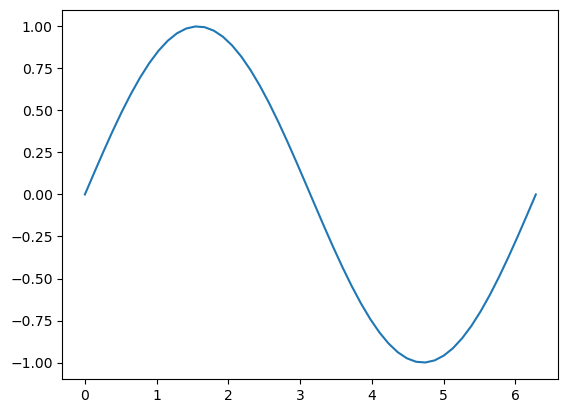

In [14]:
x = sp.Symbol("x")
expr = sp.sin(x)
f = sp.lambdify(x, expr) 
y = np.linspace(0,2*pi,50)
        
plt.plot(y,f(y))

## Exercice 2. Développements limités 

<span style="color:red">**Outre les codes, vous avez trois reponses aux Question 2,3,4 à rediger !**</span>

Pour demander à **SymPy** afficher le développement limité de $\tan(x)$ on utilise les instructions suivants

```python
expr = sp.tan(x)
expr.series(x, 0, 6)
```

1. On va utiliser les développements limités de l'exponentielle, de sinus et de cosinus dans l'exercice suivant. Demander à Sympy d'afficher ces formules.

In [25]:
sp.exp(x).series(x, 0, 6)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [26]:
sp.sin(x).series(x, 0, 6)

x - x**3/6 + x**5/120 + O(x**6)

In [30]:
sp.cos(x).series(x, 0, 6)

1 - x**2/2 + x**4/24 + O(x**6)

**Question 2.** Rappeler la formule générale de Taylor pour une fonction arbitraire $f$ au vosinage d'un point $x_0$.

> Votre reponse ici.

2. Ecrire une fonction **approx_taylor(expr, x, x0, n, a, b)** qui prend une expression expr, un symbole x, un nombre x0, un entier n, et deux nombres a et b, et qui va : 

* calculer et afficher le polynôme $\Pi$ qui represente les n premiers termes non-nuls du DL de **expr** (qui est une expression qui dépend de x et des dérivées de expr) en x0 

* tracer le graphe de $\Pi$ sur l'intervalle [a,b], à l'aide de matplotlib.

(*Attention.* Pour etre efficace, il ne faut pas recalculer n! à chaque étape) 

In [31]:
def approx_taylor(expr, x, x0, n, a, b):
    v = expr.subs(x, x0)
    fact = 1
    for i in range(n-1):
        fact = (i+1)*fact
        df = sp.diff(expr, (x,i+1))
        v = v + df.subs(x,x0)/(fact)*(x-x0)**(i+1) 
        v.subs(x0,0)
        
    P=sp.lambdify(x, v) 
        
    f=sp.lambdify(x, expr) 
    y = np.linspace(a,b,50)
        
    plt.plot(y,f(y))
    plt.plot(y,P(y))
    plt.show()
    return v

3. Utilisez votre fonction **approx_taylor(expr, x, x0, n, a, b)** pour l'exponentielle, le sinus et le cosinus et comparer l'affcihage de DL avec vos resultats de la question 1, ainsi que les graphes de polynômes et les fonctions elles-mêmes. Fixer $x_0$ et l'intervalle $[a,b]$ de façon pertinante et faire varier la valeur de $n$.

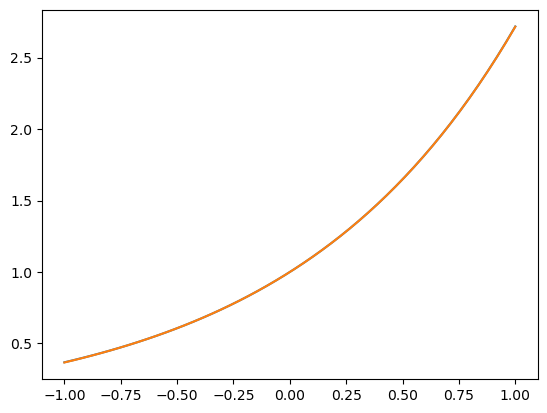

x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

In [32]:
x = sp.Symbol("x")
approx_taylor(sp.exp(x), x, 0, 6, -1, 1)

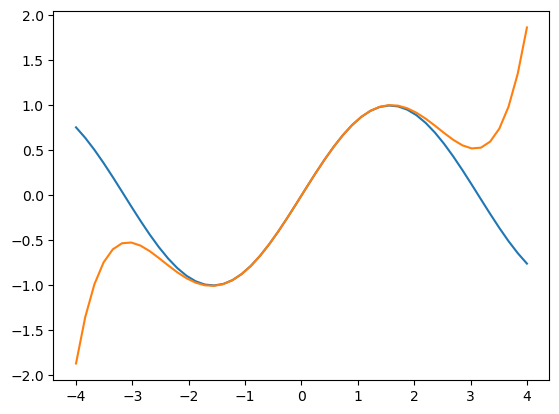

x**5/120 - x**3/6 + x

In [33]:
approx_taylor(sp.sin(x), x, 0, 6, -4, 4)

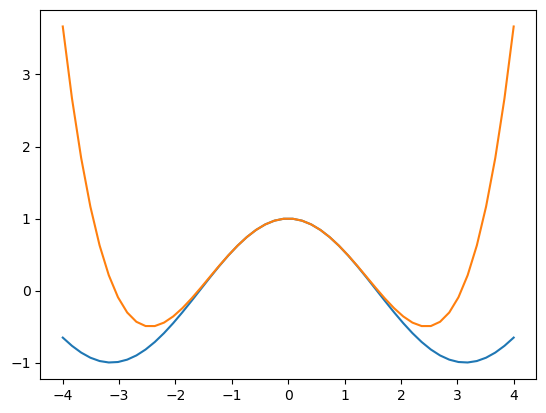

x**4/24 - x**2/2 + 1

In [45]:
approx_taylor(sp.cos(x), x, 0, 6, -4, 4)

**Question 3**. Commenter les resultats obtenus.

> Votre reponse ici.

3. Modifier votre fonction **approx_taylor(expr, x, x0, n, a, b)** pour afficher le graphique de $f: f(x)=e^x$ ainsi que les polynômes $\Pi$ de DL sur le même graphique pour $n = 1, 2, 4, 8, 16, 32, 64$ en point $0$ sur l'intervalles $[-4,4]$.

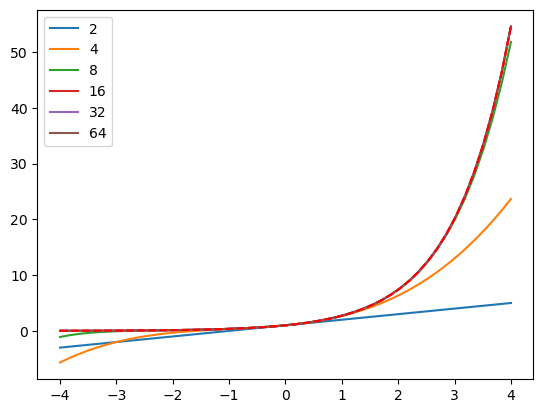

In [35]:
def approx_taylorEXP(expr, x, x0, n, a, b):
    v = expr.subs(x, x0)
    fact = 1
    for i in range(n-1):
        fact = (i+1)*fact
        df = sp.diff(expr, (x,i+1))
        v = v + df.subs(x,x0)/(fact)*(x-x0)**(i+1) 
        v.subs(x0,0)
        
    P=sp.lambdify(x, v) 
    y = np.linspace(a,b,50)
    plt.plot(y,P(y), label=str(n))
    return v

for i in range(1,7):
    approx_taylorEXP(sp.exp(x), x, 0, 2**i, -4, 4)
y = np.linspace(-4, 4, 50)
plt.plot(y,np.exp(y),'--r')
plt.legend()
plt.show()

**Question 4**. Commenter les resultats obtenus.

> Votre reponse ici.

4. On pose 
$$f(x)=\frac{1}{1+x}, \quad g(x)=e^{-x}, \quad h(x)=\sqrt{1 - 2 \sin x}$$
Préciser les positions relatives au voisinage de 0 des graphes des fonctions. Verifier graphiquement à l'aide de Python. 

*Indication.* Faire un développement limité en 0 à un ordre suffisant pour qu'on puisse distinguer les fonctions.

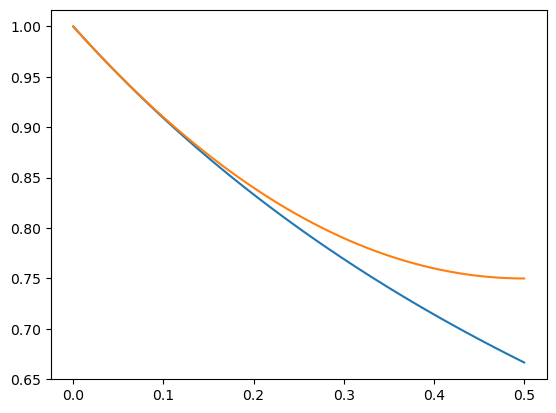

x**2 - x + 1

In [37]:
approx_taylor(1/(1+x), x, 0, 3, 0, 0.5)

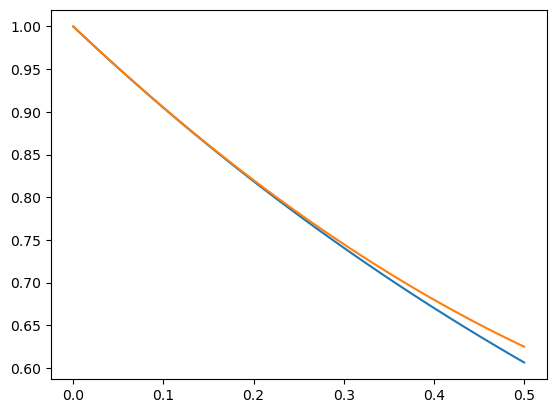

x**2/2 - x + 1

In [38]:
approx_taylor(sp.exp(-x), x, 0, 3, 0, 0.5)

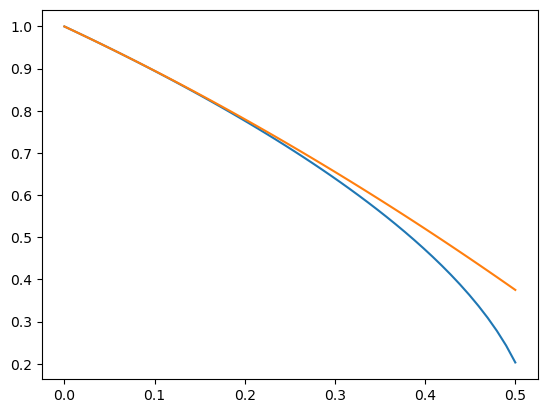

-x**2/2 - x + 1

In [39]:
approx_taylor(sp.sqrt(1 - 2*sp.sin(x)), x, 0, 3, 0, 0.5)

En comparant donc les termes d'ordre 2, on trouve $h \leq g \leq f$. On verifier graphiquement et les courbes représentatives sont bien sûr dans le même ordre.

In [ ]:
x = np.linspace(0,0.5,20)
plt.plot(x, 1/(1+x), label = 'f')
plt.plot(x, np.exp(-x), label = 'g')
plt.plot(x, np.sqrt(1 - 2*np.sin(x)), label = 'h')
plt.legend()
plt.show()

## Exercice 3. Estimation de reste et approximation.


Nous avons compris que les développements limités, permettent d'approcher **localement** (au voisinage d'un point) une fonction par une fonction plus simple. Nous avons utilisé un développement limité avec le théorème des petits angles, quand nous avons approximé $\cos \theta$ par $1$ quand $\theta$ est petit dans le CM 1.

Dans l'exercice precedent nous avons consideré le DL de la focntion sinus, au voisinage de $0$ on peut l'ecrire ainsi

$$
sin(x) \approx x-\frac{x^3}{3!}+\frac{x^5}{5!} + \ldots + (-1)^n\frac{x^{2n+1}}{(2n+1)!} +\mathcal{o}\left(x^{2n+2}\right)
$$

Dans cette formule, le dernier terme (le petit o) est négligeable quand x tend vers 0. On l'appelle *le reste* du développement, $n$ est l'ordre du développement. 

Le théorème des petits angles que nous avons utilisé, et qui a son importance egalement dans les application en optique, utilise un développement à l'ordre 0.

On vous demande d'écrire un programme qui demande à l'utilisateur un angle compris entre $-\pi$ et $\pi$, une précision, et qui calcule le sinus en utilisant la formule du développement limité. Ensuite il affiche le sinus de l'angle calculé et le sinus calculé avec la formule, ainsi que l'ordre nécessaire pour atteindre la précision souhaitée. 

Par exemple pour l'angle $\pi/2$ pour obtenir une précision de $0.001$, nous devrions utiliser l'ordre du développement égale à $4$. Verifier avec votre programme.

Dans cette exercice on vous invite d'utiliser les bibliotheque de Python numériques **math** et **NumPy** (on les a déjà importé), on va plus se servir de la biblithèque **SymPy**. 


*Indication.* Pour ce nouveau programme il suffit d'écrire une boucle qui calcule le nouveau terme (ordre n) qui s'arrete dès que le terme d'ordre n est plus petit que la précision. Attention: pour etre efficace, il ne faut pas recalculer (2n+1)! à chaque étape mais utiliser le fait que $(2n+1)!=(2n+1)\times2n\times(2n-1)!$.

In [41]:
def approx_precision(theta, precision):
    DL = theta
    n = 1
    fact = 1;
    while abs(sin(theta) - DL) > precision:
        fact = (2*n+1)*2*n*fact
        DL = DL + (-1)**n*theta**(2*n+1)/fact
        n=n+1
    return n, sin(theta), DL

eps = 1e-3
angle = pi/2
n, s, valDL = approx_precision(angle, eps)

print("pour approcher la valeur de sin de ", angle, " avec la precision ", eps, " il faut l'ordre", n)

pour approcher la valeur de sin de  1.5707963267948966  avec la precision  0.001  il faut l'ordre 4


Faites un test de votre programme pour constater que plus l'angle est proche de $\pi$, plus il faut un ordre élevé pour atteindre la précision.

In [42]:
n1, _, _ = approx_precision(pi/4, 1e-5)
n2, _, _ = approx_precision(pi/3, 1e-5)
n3, _, _ = approx_precision(pi/2, 1e-5)
n4, _, _ = approx_precision(pi, 1e-5)

print("pour avoir la précision 0.00001")
print("pour ", pi/4, "il faut l'ordre", n1)
print("pour ", pi/3, "il faut l'ordre", n2)
print("pour ", pi/2, "il faut l'ordre", n3)
print("pour ", pi, "il faut l'ordre", n4)

pour avoir la précision 0.00001
pour  0.7853981633974483 il faut l'ordre 4
pour  1.0471975511965976 il faut l'ordre 4
pour  1.5707963267948966 il faut l'ordre 5
pour  3.141592653589793 il faut l'ordre 8


## Exercice 4. Calcul de $\pi$

Le développement limité de arcsin est

$$
\arcsin (x)=\sum_{n=0}^{N-1} \frac{(2 n) !}{\left(n ! 2^n\right)^2} \frac{x^{2 n+1}}{2 n+1}+o\left(x^{2 N+1}\right)
$$

On peut vérifier que le développement limité est convergeant sur $(−1, 1)$. En déduire une formule permettant de calculer $\pi$. Etudier la dépendance de la precision de l'ordre de DL.

In [44]:
def calcul_pi(x, n):
    DL = 0
    fact2n = 1
    factn = 1
    p = 1
    for i in range(n):
        
        DL = DL + fact2n/(factn*p)**2 * x**(2*i+1)/(2*i+1)
        
        fact2n = (2*i+1)*(2*i+2)*fact2n
        factn = (i+1)*factn
        p = 2*p
        
    return DL



print(4*calcul_pi(sqrt(2)/2, 1000))

n = 2
print("precision ", '%.2e' %  abs(4*calcul_pi(sqrt(2)/2, n) - pi), "pour l'ordre ",n)

n = 4
print("precision ", '%.2e' %  abs(4*calcul_pi(sqrt(2)/2, n) - pi), "pour l'ordre ",n)

n = 10
print("precision ", '%.2e' % abs(4*calcul_pi(sqrt(2)/2, n) - pi), "pour l'ordre ",n)

3.1415926535897922
precision  7.75e-02 pour l'ordre  2
precision  8.65e-03 pour l'ordre  4
precision  4.13e-05 pour l'ordre  10
